In [ ]:
! pip install pandas

In [ ]:
! pip install numpy

In [ ]:
! pip install matplotlib

In [ ]:
! pip install seaborn

In [ ]:
! pip install sklearn

In [ ]:
! pip install scikit-learn

In [ ]:
! pip install statsmodels

In [ ]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
import statsmodels.api as sm  
from sklearn.model_selection import train_test_split, TimeSeriesSplit  
from sklearn.linear_model import LinearRegression  
from sklearn.ensemble import RandomForestRegressor  
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

In [ ]:
sns.set(style="whitegrid", palette="muted", font_scale=1.1)  
%matplotlib inline 

In [ ]:
! pip install openpyxl

In [ ]:
file_path = r"D:\AI Projects\powerthon\powerthon_AI\wetransfer_apdcl-net-metering-consumers-data-april-sep-25_2025-10-20_0312 (1)\Anvil Third Phase part 1.xlsx"  # change this to your actual file  
df = pd.read_excel(file_path)  
print("Initial shape:", df.shape)  
display(df.head()) 

In [ ]:
# 2. Inspect & Clean  
df.info()  
print(df.describe(include='all'))  
print("Missing values per column:\n", df.isna().sum())  

In [ ]:
# Parse Date & Time  
df['datetime'] = pd.to_datetime(df['Date & Time'], errors='coerce')  # adjust colname  
df = df.dropna(subset=['datetime'])  
df = df.set_index('datetime')

In [ ]:
# Convert numeric columns (adjust names if needed)  
numeric_cols = ['Voltage_BN','Voltage_RN','Voltage_YN',  
                'Current_B','Current_R','Current_Y',  
                'PF','Frequency','kVAh']  
for c in numeric_cols:  
    if c in df.columns:  
        df[c] = pd.to_numeric(df[c], errors='coerce') 

In [ ]:
print("After conversion, missing numeric values:\n", df[numeric_cols].isna().sum())  


In [ ]:
# 3. Descriptive Analysis  
## 3.1 Summary Statistics  
stats = df[numeric_cols].agg(['mean','std','min','max','median'])  
stats.loc['CoV(%)'] = stats.loc['std'] / stats.loc['mean'] * 100  
print("Summary statistics:\n", stats)  

In [ ]:
## 3.2 Visualisations – Time Series  
plt.figure(figsize=(14,5))  
df[['Voltage_BN','Voltage_RN','Voltage_YN']].plot(title="Voltage (Phases B, R, Y) Over Time")  
plt.ylabel("Voltage (V)")  
plt.show() 

In [ ]:
plt.figure(figsize=(14,5))  
df[['Current_B','Current_R','Current_Y']].plot(title="Current (Phases B, R, Y) Over Time")  
plt.ylabel("Current (A)")  
plt.show()  


In [ ]:
plt.figure(figsize=(14,5))  
df['PF'].plot(title="Power Factor (PF) Over Time")  
plt.ylabel("PF")  
plt.show()  

In [ ]:
## 3.3 Distribution & Outlier Checking  
plt.figure(figsize=(8,6))  
sns.boxplot(data=df[['Voltage_BN','Voltage_RN','Voltage_YN']])  
plt.title("Voltage Phases – Boxplot")  
plt.show() 

In [ ]:
plt.figure(figsize=(8,6))  
df['PF'].hist(bins=50)  
plt.title("Distribution of PF")  
plt.xlabel("PF")  
plt.ylabel("Count")  
plt.show()  


In [ ]:
# 4. Inferential Statistical Analysis  
## 4.1 Correlation Matrix  
corr = df[numeric_cols].corr()  
plt.figure(figsize=(10,8))  
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')  
plt.title("Correlation Matrix")  
plt.show()  
print("Correlation values:\n", corr) 

In [ ]:
## 4.2 Regression Analysis (example: PF ~ Voltages + Currents)  
# Prepare data: drop rows with missing values in selected columns  
reg_cols = ['PF','Voltage_BN','Voltage_RN','Voltage_YN','Current_B','Current_R','Current_Y']  
reg_df = df[reg_cols].dropna()  
X = reg_df[['Voltage_BN','Voltage_RN','Voltage_YN','Current_B','Current_R','Current_Y']]  
y = reg_df['PF']  
model = LinearRegression()  
model.fit(X, y)  
print("Regression coefficients:", model.coef_)  
print("Intercept:", model.intercept_)  
y_pred = model.predict(X)  
print("R² score:", model.score(X, y))  
print("MAE:", mean_absolute_error(y, y_pred))  
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))  

In [ ]:
# 5. Predictive Statistical Analysis  
## 5.1 Feature engineering for forecasting (example: forecast PF)  
df_feat = df.copy()  
# create lag features (example: last-hour PF)  
df_feat['PF_lag1'] = df_feat['PF'].shift(1)  
df_feat['PF_lag2'] = df_feat['PF'].shift(2)  
# drop NaNs  
df_feat = df_feat.dropna(subset=['PF','PF_lag1','PF_lag2'])  

In [ ]:
features = ['PF_lag1','PF_lag2','Voltage_BN','Voltage_RN','Voltage_YN','Current_B','Current_R','Current_Y']  
X2 = df_feat[features]  
y2 = df_feat['PF']  

In [ ]:
# Train/Test split  
split_index = int(len(X2)*0.8)  
X_train, X_test = X2.iloc[:split_index], X2.iloc[split_index:]  
y_train, y_test = y2.iloc[:split_index], y2.iloc[split_index:] 

In [ ]:
# Model (example: Random Forest)  
rf = RandomForestRegressor(n_estimators=100, random_state=42)  
rf.fit(X_train, y_train)  
y_pred2 = rf.predict(X_test)  
print("Predictive Model – R²:", r2_score(y_test, y_pred2))  
print("MAE:", mean_absolute_error(y_test, y_pred2))  
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred2)))

In [ ]:
plt.figure(figsize=(12,5))  
plt.plot(y_test.index, y_test, label='Actual PF')  
plt.plot(y_test.index, y_pred2, label='Predicted PF', alpha=0.7)  
plt.title("Actual vs Predicted PF")  
plt.legend()  
plt.show()  

In [ ]:
# 6. Prescriptive Statistical Analysis  
## 6.1 Scenario Simulation / What-if Analysis  
# Example: If Voltage_B is reduced/increased by some %, what happens to predicted PF?
# We take a sample of test set, adjust Voltage_B by +5% and predict
X_sample = X_test.copy().iloc[:100]  
X_sample_mod = X_sample.copy()  
X_sample_mod['Voltage_BN'] = X_sample_mod['Voltage_BN'] * 1.05  
y_pred_orig = rf.predict(X_sample)  
y_pred_mod = rf.predict(X_sample_mod)  
print("Average PF original:", np.mean(y_pred_orig))  
print("Average PF if Voltage_B increased by 5%:", np.mean(y_pred_mod)) 

In [ ]:
## 6.2 Recommendation / Summary  
# For example: “Increasing Voltage_B by 5% leads to average predicted PF of …, hence consider balancing load on phase B”  
print("Recommendation: If Voltage_B can be optimised/balanced, PF is likely to shift from {:.3f} to {:.3f}".format(
    np.mean(y_pred_orig), np.mean(y_pred_mod)
))  

In [ ]:
# 7. Summary & Export  
stats.to_csv("summary_statistics.csv")  
df_feat.to_excel("engineered_dataset.xlsx")  
print("Exports done: summary_statistics.csv and engineered_dataset.xlsx")  

descriptive analsis

In [2]:
! pip install numpy
! pip install pandas


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd 
import numpy as np 

In [ ]:
file_path = r"D:\AI Projects\powerthon\powerthon_AI\wetransfer_apdcl-net-metering-consumers-data-april-sep-25_2025-10-20_0312 (1)\Anvil Third Phase part 1.xlsx"  # change this to your actual file  
df = pd.read_excel(file_path)

In [6]:
# View top rows
df.head()

# View summary of columns & data types
df.info()

# Summary statistics for numeric columns
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903577 entries, 0 to 903576
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   MSN          903577 non-null  object 
 1   Consumer Id  903577 non-null  int64  
 2   Date & Time  903577 non-null  object 
 3   KWH_I_TOTAL  903577 non-null  float64
 4   KWH_E_TOTAL  903577 non-null  int64  
 5   kVAh         903577 non-null  float64
 6   Voltage_BN   903577 non-null  float64
 7   Voltage_RN   903577 non-null  float64
 8   Voltage_YN   903577 non-null  float64
 9   Current_B    903577 non-null  float64
 10  Current_R    903577 non-null  float64
 11  Current_Y    903577 non-null  float64
 12  Frequency    903577 non-null  int64  
 13  PF           903577 non-null  float64
dtypes: float64(9), int64(3), object(2)
memory usage: 96.5+ MB


,Consumer Id,KWH_I_TOTAL,KWH_E_TOTAL,kVAh,Voltage_BN,Voltage_RN,Voltage_YN,Current_B,Current_R,Current_Y,Frequency,PF
count,9.035770e+05,903577.000000,903577.0,903577.000000,903577.000000,903577.000000,903577.000000,903577.000000,903577.000000,903577.000000,903577.0,903577.000000
mean,1.741965e+11,15.623012,0.0,16.716277,236.208186,235.997915,232.728816,0.206057,0.221242,0.441994,0.0,0.865024
std,1.822787e+10,9.596690,0.0,9.958653,22.461068,29.187501,38.906560,2.633442,2.457893,2.678772,0.0,0.170501
min,1.470000e+11,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,-16.440000,-292.630000,-16.590000,0.0,0.000000
25%,1.710000e+11,8.825030,0.0,9.654870,231.730000,233.400000,232.700000,-0.480000,-0.260000,0.000000,0.0,0.810000
50%,1.710000e+11,13.927930,0.0,14.658050,239.500000,240.400000,240.300000,0.270000,0.190000,0.370000,0.0,0.940000
75%,1.710100e+11,20.977240,0.0,22.130660,246.000000,246.900000,246.700000,1.020000,0.810000,1.140000,0.0,0.980000
max,2.090101e+11,48.774960,0.0,52.412940,453.100000,424.900000,452.700000,35.400000,34.520000,41.960000,0.0,1.000000


Measures of Frequency

In [8]:
# If you had a categorical column, e.g., “Consumer”
df["Consumer Id"].value_counts()

# Relative frequency
df["Consumer Id"].value_counts(normalize=True)


Consumer Id
207000017640    0.011857
207000025121    0.011671
209000015937    0.011613
207000013496    0.011612
209010061048    0.011560
                  ...   
148000004483    0.005085
147010052470    0.005050
171010040396    0.004659
171000017902    0.001193
171000023457    0.000595
Name: proportion, Length: 106, dtype: float64

Measures of Central Tendency

In [9]:
cols = ["Voltage_BN", "Voltage_RN", "Voltage_YN", "Current_B", "PF"]
for c in cols:
    print(c)
    print("Mean :", df[c].mean())
    print("Median:", df[c].median())
    print("Mode :", df[c].mode().values)  # mode() may return multiple
    print()


Voltage_BN
Mean : 236.20818600960402
Median: 239.5
Mode : [0.]

Voltage_RN
Mean : 235.99791463262125
Median: 240.4
Mode : [0.]

Voltage_YN
Mean : 232.72881572904134
Median: 240.3
Mode : [0.]

Current_B
Mean : 0.20605729229495662
Median: 0.27
Mode : [0.]

PF
Mean : 0.8650235785107412
Median: 0.94
Mode : [0.99]



Measures of Dispersion (Spread)

In [10]:
for c in cols:
    print(c)
    print("Range     :", df[c].max() - df[c].min())
    print("Variance  :", df[c].var(ddof=0))     # population variance
    print("Std Dev   :", df[c].std(ddof=0))     # population std
    print()


Voltage_BN
Range     : 453.1
Variance  : 504.4990036556095
Std Dev   : 22.461055265850923

Voltage_RN
Range     : 424.9
Variance  : 851.9092520538514
Std Dev   : 29.187484510554373

Voltage_YN
Range     : 452.7
Variance  : 1513.7187237573946
Std Dev   : 38.906538316295816

Current_B
Range     : 51.84
Variance  : 6.935009204247223
Std Dev   : 2.633440564024034

PF
Range     : 1.0
Variance  : 0.029070500380886
Std Dev   : 0.17050073425321663



Additional descriptive statistics

In [11]:
for c in cols:
    print(c)
    print("25th percentile:", df[c].quantile(0.25))
    print("50th percentile (median):", df[c].quantile(0.50))
    print("75th percentile:", df[c].quantile(0.75))
    print("Skewness:", df[c].skew())
    print("Kurtosis:", df[c].kurt())
    print()


Voltage_BN
25th percentile: 231.73
50th percentile (median): 239.5
75th percentile: 246.0
Skewness: -7.330179005208604
Kurtosis: 72.32924669059543

Voltage_RN
25th percentile: 233.4
50th percentile (median): 240.4
75th percentile: 246.9
Skewness: -6.567315757731489
Kurtosis: 49.32354216055924

Voltage_YN
25th percentile: 232.7
50th percentile (median): 240.3
75th percentile: 246.7
Skewness: -5.141401531066168
Kurtosis: 27.3626943256969

Current_B
25th percentile: -0.48
50th percentile (median): 0.27
75th percentile: 1.02
Skewness: 0.4105879049237963
Kurtosis: 6.247700778112115

PF
25th percentile: 0.81
50th percentile (median): 0.94
75th percentile: 0.98
Skewness: -2.0083609935218156
Kurtosis: 4.250647358404772



Visualisation to support descriptive statistics

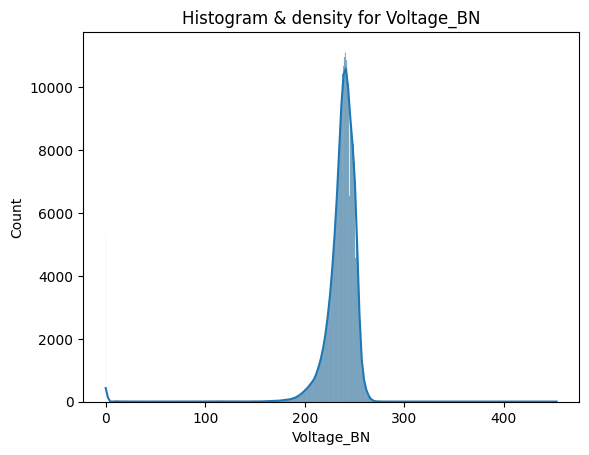

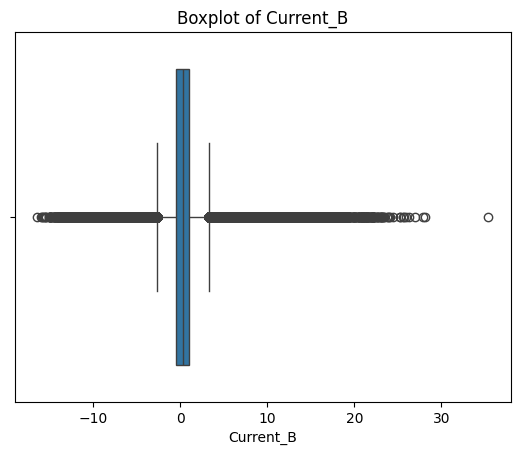

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for one column
sns.histplot(data=df, x="Voltage_BN", kde=True)
plt.title("Histogram & density for Voltage_BN")
plt.show()

# Box plot for spread & outliers
sns.boxplot(data=df, x="Current_B")
plt.title("Boxplot of Current_B")
plt.show()
